**Project 8 : Gold Price Prediction**



---

Vikash Kumar


---




**Importting the libraries of the dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data Collection and Data Processing**

In [2]:
# Loading the dataset to the pandas dataframe
gold_dataset = pd.read_csv('/content/gld_price_data.csv')

In [4]:
# Printing the top 5 rows of the dataset
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# Printing the last 5 rows of the dataset
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# Total rows and columns
gold_dataset.shape

(2290, 6)

In [7]:
# Getting some information of the dataset
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# To find either any column have any null values
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# Describe some statistical info about the data
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

   1. Positive Correlation
   2. Negative Correlation

In [14]:
correlation = gold_dataset.corr()

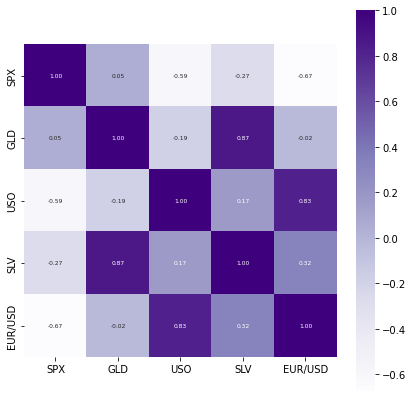

In [17]:
# Constructing the heatmap to understand the correlation among the columns
plt.figure(figsize= (7,7))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':6}, cmap='Purples' )

In [18]:
# Correlation value of gold wrt to other columns
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


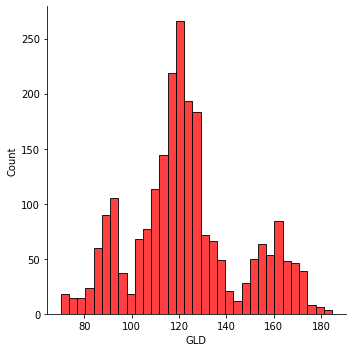

In [21]:
# Checking the distribution of the Gold price
sns.displot(gold_dataset['GLD'],color='red')

**Splitting the features and target**

In [22]:
X = gold_dataset.drop(['Date','GLD'], axis=1)
Y = gold_dataset['GLD']

In [23]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


**Dividing the dataframe to Train and Test Data**

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

**Model Training:**

**Random Forest Regessor**

In [25]:
regressor = RandomForestRegressor(n_estimators=100)

In [26]:
# Training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

**Model Evaluation**

In [27]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [28]:
# R Squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [29]:
print("The R Squared Error of the model is :", error_score)

The R Squared Error of the model is : 0.9861736718998846


**Comparing the predicted and actual price of the gold**

In [30]:
Y_test = list(Y_test)

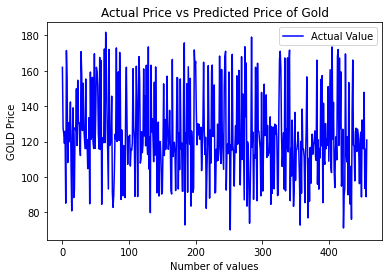

In [32]:
# Plot of actual value of Gold
plt.plot(Y_test, color='blue', label = 'Actual Value')
# plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price of Gold')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()

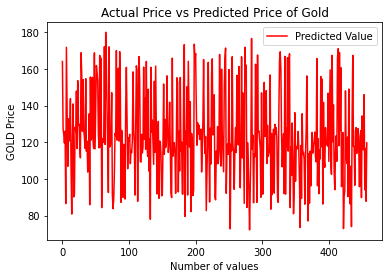

In [34]:
# Plot of Predicted Value of Gold
# plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price of Gold')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()

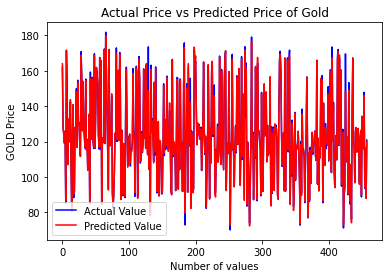

In [35]:
# Comparision between the Actual and Predicted Value of Gold
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price of Gold')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()